#  Olympic dataset 

* **Importing all the** **libraries**


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import random

* **Reading, exploring and cleaning the** **data**

In [2]:
df = pd.read_csv('/content/olympix_data_organized_with_header (1).csv') #here I am reading the csv file in python using the pd.read_csv function in pandas library
df

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


In [3]:
df.head().T # df.head() is used to display the first 5 rows of your dataset.You can also choose to display as many rows as you want by passing values inside 
#the parenthesis. For eg: df.head(15) will display the first 15 rows of your dataset

,0,1,2,3,4
name,Michael Phelps,Michael Phelps,Michael Phelps,Natalie Coughlin,Aleksey Nemov
age,23.0,19.0,27.0,25.0,24.0
country,United States,United States,United States,United States,Russia
year,2008,2004,2012,2008,2000
Date_Given,8/24/2008,8/29/2004,08-12-2012,8/24/2008,10-01-2000
sports,Swimming,Swimming,Swimming,Swimming,Gymnastics
gold_medal,8,6,4,1,2
silver_medal,0,0,2,2,1
brone_medal,0,2,0,3,3
total_medal,8,8,6,6,6


In [4]:
df.shape #df.shape gives the number of rows and columns in your dataset. This dataset has 8618 rows and 10 columns

(8618, 10)

In [ ]:
cols=df.columns #df.columns is used to display the all the columns in your dataset.Here I have printed the names of the columns in a list format by using
#print(list(cols))
print(list(cols))

['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal', 'silver_medal', 'brone_medal', 'total_medal']


In [5]:
df.info() #here df.info() displays the column names, their datatypes & their non-null count which clearly shows that there are some missing values in name and age column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [ ]:
df.index #this gives us the first and last index of the dataset

RangeIndex(start=0, stop=8618, step=1)

In [ ]:
df.describe() #this command gives us the numerical measures for the numerical columns as seen below

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


In [ ]:
df.describe(include='all') #this command gives some additional numerical measures such as unique,top,frequency for the numerical columns as seen below

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
count,8613,8613.000000,8618,8618.000000,8618,8618,8618.000000,8618.000000,8618.000000,8618.000000
unique,6955,NaN,110,NaN,7,49,NaN,NaN,NaN,NaN
top,Matt Wells,NaN,United States,NaN,8/24/2008,Athletics,NaN,NaN,NaN,NaN
freq,4,NaN,1109,NaN,1872,687,NaN,NaN,NaN,NaN
mean,NaN,26.405434,NaN,2005.978881,NaN,NaN,0.364702,0.363309,0.377698,1.105709
std,NaN,5.102118,NaN,4.289946,NaN,NaN,0.545349,0.511613,0.505005,0.408892
min,NaN,15.000000,NaN,2000.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,23.000000,NaN,2002.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,NaN,26.000000,NaN,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,NaN,29.000000,NaN,2010.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes #gives the datatypes of the columns.

name             object
age             float64
country          object
year              int64
Date_Given       object
sports           object
gold_medal        int64
silver_medal      int64
brone_medal       int64
total_medal       int64
dtype: object

In [ ]:
#Typecasting :changing one datetype to another
#'Age' column I had a doubt whether it should be int64 or float64 but a person can be 26 years and 4 months old which equals to 26.4 so float64 datatype for age column is correct.
# If you want to change the datatype of the columns in your dataset the syntax  is as follows:
df = df.astype({'column_name_1':'datatype_1','column_name_2':'datatype_2'})# datatypes: object,float64,int64

In [ ]:
df.nunique() #gives the number of unique values in each column which gives us an idea whether or not to drop the columns.We drop the columns based on two
             #conditions: a.If all the values in a column are unique
             #            b.If a column has recurring values .For example:Column [country]:('India','India','India'.......)

name            6955
age               42
country          110
year               7
Date_Given         7
sports            49
gold_medal         7
silver_medal       4
brone_medal        4
total_medal        7
dtype: int64

In [8]:
df.value_counts('name') # gives the count of unique values in categorical column.In this case the categorical column is name   
df['name'].unique() #gives the unique values in categorical columns

df.value_counts('country') # gives the count of unique values in categorical column.In this case the categorical column is country   
df['country'].unique() #gives the unique values in categorical columns

df.value_counts('sports') # gives the count of unique values in categorical column.In this case the categorical column is sports   
df['sports'].unique() #gives the unique values in categorical columns

array(['Swimming', 'Gymnastics', 'Speed Skating', 'Cross Country Skiing',
       'Short-Track Speed Skating', 'Diving', 'Cycling', 'Biathlon',
       'Alpine Skiing', 'Ski Jumping', 'Nordic Combined', 'Athletics',
       'Table Tennis', 'Tennis', 'Synchronized Swimming', 'Shooting',
       'Rowing', 'Fencing', 'Equestrian', 'Canoeing', 'Bobsleigh',
       'Badminton', 'Archery', 'Wrestling', 'Weightlifting', 'Waterpolo',
       'Volleyball', 'Triathlon', 'Trampoline', 'Taekwondo', 'Softball',
       'Snowboarding', 'Skeleton', 'Sailing', 'Rhythmic Gymnastics',
       'Modern Pentathlon', 'Luge', 'Judo', 'Ice Hockey', 'Hockey',
       'Handball', 'Football', 'Figure Skating', 'Freestyle Skiing',
       'Curling', 'Baseball', 'Boxing', 'Beach Volleyball', 'Basketball'],
      dtype=object)

* Missing value treatment

In [45]:

df.isnull().sum() #gives the count of missing values in each column
# In this dataset it clearly signifies that there are 5 missing values in the name & age column




name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
total_medal     0
bronze_medal    0
dtype: int64

In [41]:
df['name'].fillna(method='ffill',inplace=True) #Here I have used 'ffill' method to fill the missing values in name column.'ffill' fills the NaN values with 
#the value above it

In [42]:
df['age'].fillna(df['age'].mean(),inplace=True) #fills the missing values in age column with the average value of age.It is numerical column named 'age' hence I used .mean() to fill the missing values

In [43]:
df['bronze_medal']=df['brone_medal'] #Created new column 'bronze_medal' as 'brone_medal' spelling is wrong

In [44]:
df.drop('brone_medal',axis=1,inplace=True) #dropped the old column 'brone_medal'

* Outlier Analysis

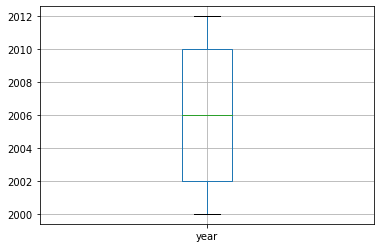

In [ ]:
#Outlier Analysis can be performed only on numerical columns and it can be performed one numerical column at a time
df.boxplot('year') #Boxplot allows us to detect the outliers visually and as seen there are no outliers in the year column

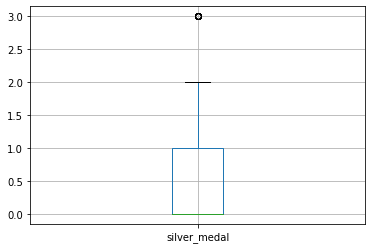

In [ ]:
df.boxplot('silver_medal') #Boxplot allows us to detect the outliers visually.
#Here clearly the percentage of outliers is less than 0.3% so no need to treat them.

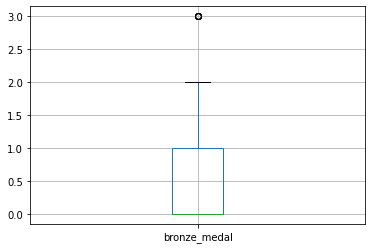

In [ ]:
df.boxplot('bronze_medal') #Boxplot allows us to detect the outliers visually.
#here clearly the percentage of outliers is less than 0.3% so no need to treat them.

* **Data Visualization**

In [ ]:
# Relational plots = relplot :scatterplot,lineplot
# distribution plots = displot : histplot,kdeplot,rugplot
# categorical plots = catplot : boxplot,barplot,violinplot

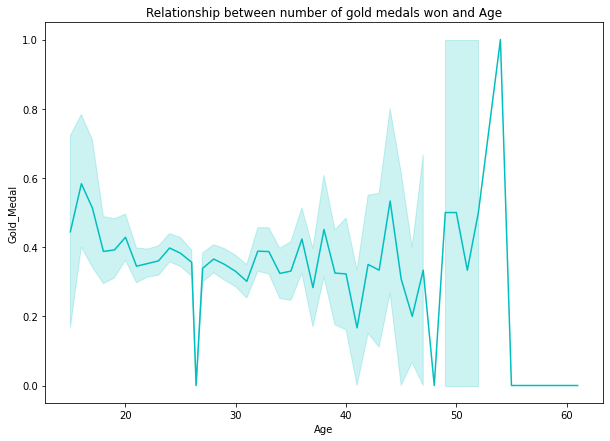

In [46]:
plt.figure(figsize=(10,7)) #plt.figure is used to set the width & height of the plot
plt.title('Relationship between number of gold medals won and Age') #Used to give Title to your plot
sns.lineplot(x='age',y='gold_medal',data=df,color='c')#Here I have used the lineplot to display the relationship between number of gold medals won and Age
plt.xlabel('Age') #Used to give label to X-axis
plt.ylabel('Gold_Medal') #Used to give label to Y-axis
plt.show() #displays the plot


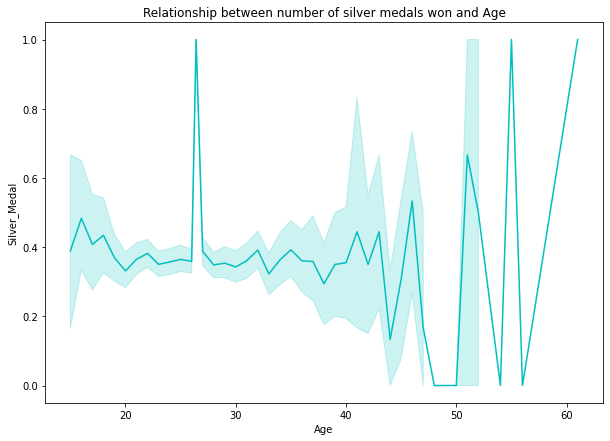

In [47]:
plt.figure(figsize=(10,7)) #plt.figure is used to set the width & height of the plot
plt.title('Relationship between number of silver medals won and Age') #Used to give Title to your plot
sns.lineplot(x='age',y='silver_medal',data=df,color='c')#Here I have used the lineplot to display the relationship between number of silver medals won and Age
plt.xlabel('Age') #Used to give label to X-axis
plt.ylabel('Silver_Medal') #Used to give label to Y-axis
plt.show() #displays the plot





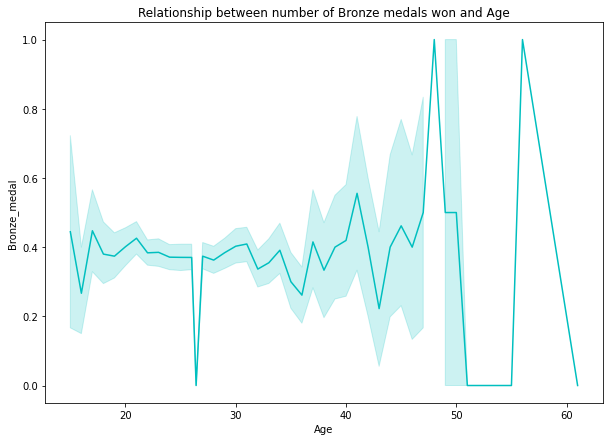

In [48]:
plt.figure(figsize=(10,7)) #plt.figure is used to set the width & height of the plot
plt.title('Relationship between number of Bronze medals won and Age') #Used to give Title to your plot
sns.lineplot(x='age',y='bronze_medal',data=df,color='c')#Here I have used the lineplot to display the relationship between number of bronze medals won and Age
plt.xlabel('Age') #Used to give label to X-axis
plt.ylabel('Bronze_medal') #Used to give label to Y-axis
plt.show() #displays the plot



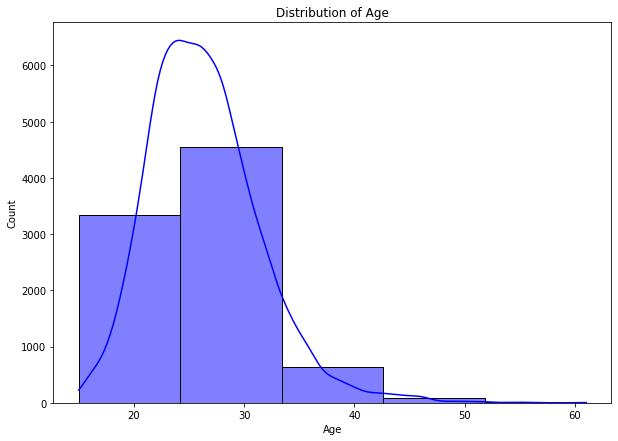

In [49]:
plt.figure(figsize=(10,7))#plt.figure is used to set the width & height of the plot
plt.title("Distribution of Age")#Used to give Title to your plot
sns.histplot(x='age',data=df,color='b',bins=5,kde=True)#Here I have used the histplot to display the distribution of age
plt.xlabel('Age')#Used to give label to X-axis
plt.show()#displays the plot



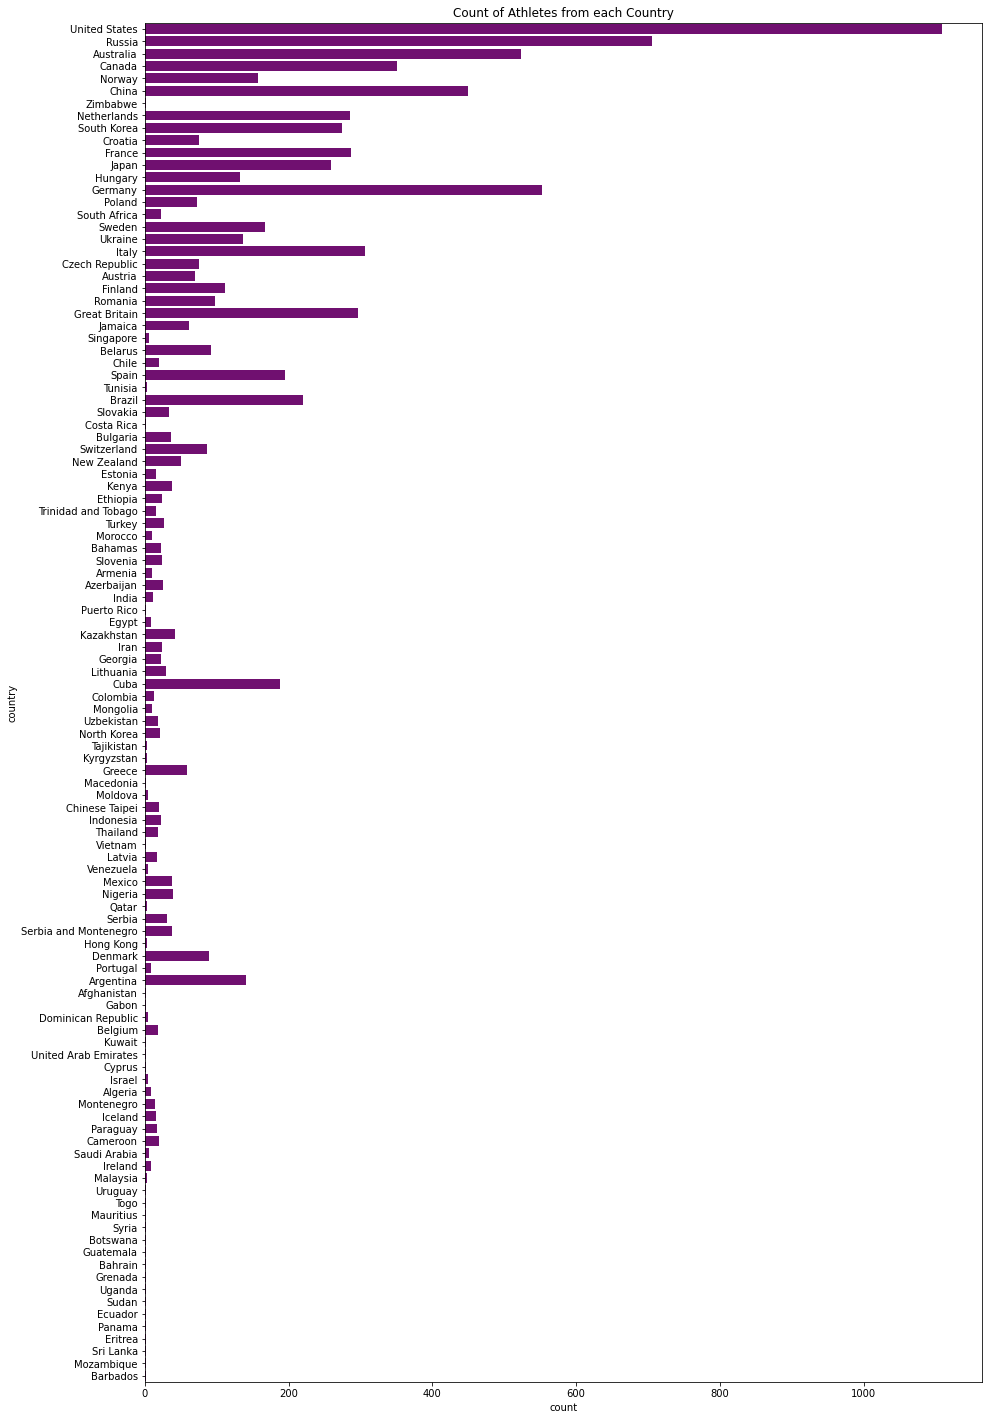

In [50]:
plt.figure(figsize=(15,25))#plt.figure is used to set the width & height of the plot
plt.title('Count of Athletes from each Country')#Used to give Title to your plot
sns.countplot(y='country',data=df,color='purple')#Here I have used the countplot to display the count of athletes from each country
plt.show()#displays the plot



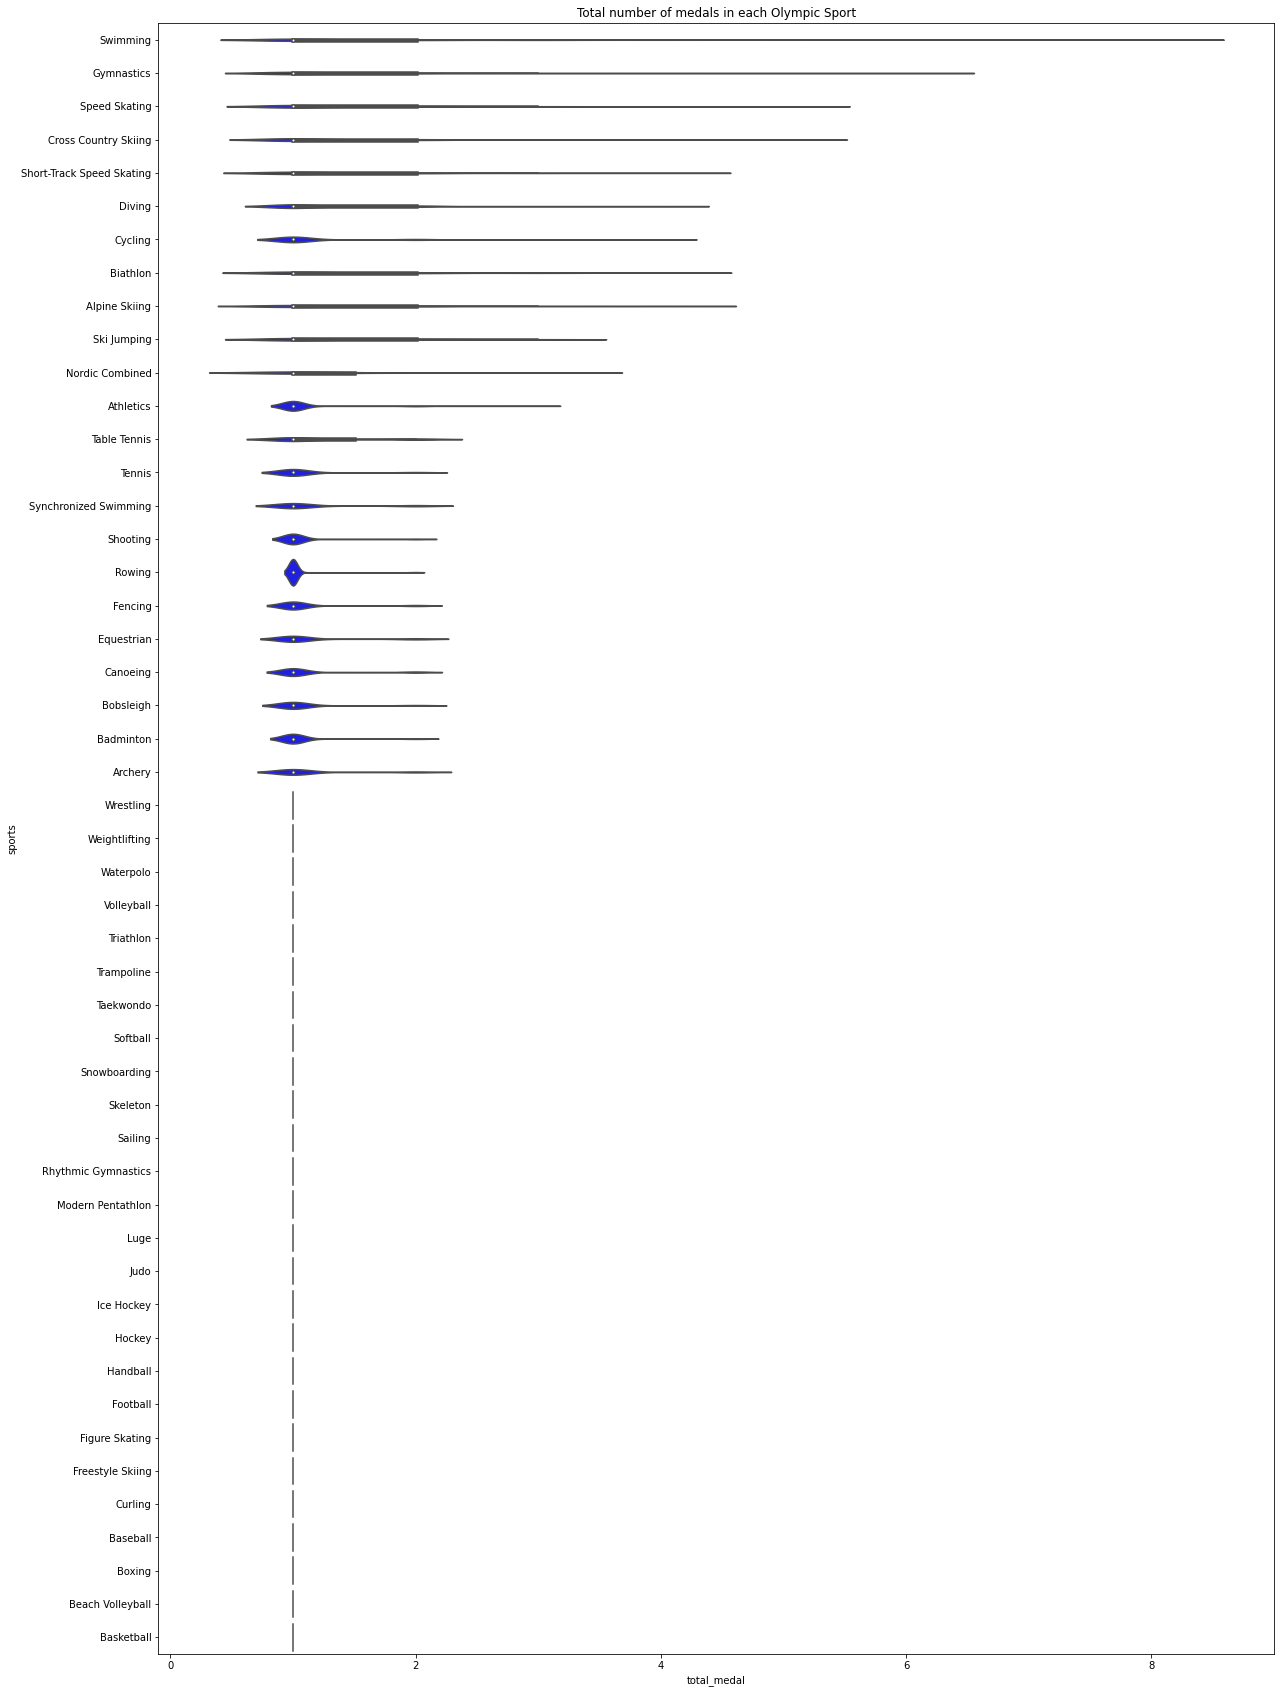

In [51]:
plt.figure(figsize=(20,30))#plt.figure is used to set the width & height of the plot
plt.title("Total number of medals in each Olympic Sport")#Used to give Title to your plot
sns.violinplot(x='total_medal',y='sports',data=df,color='b')#Here I have used the violinplot to display the total no. of medals in each Olympic Sport
plt.show()#Used to display the plot

* **Please check if the age dataset is skewed or symmetric. Based on results perform transformation.**

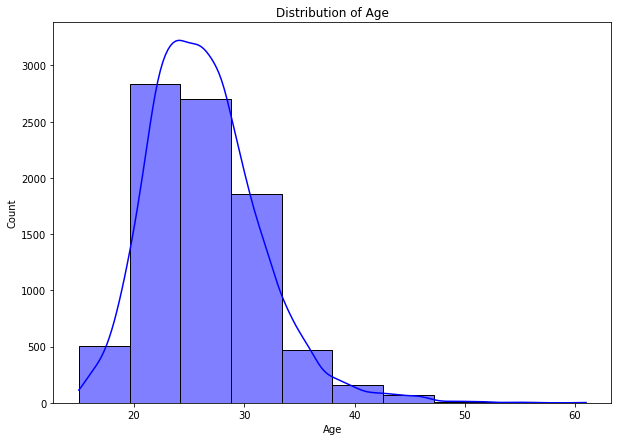

In [53]:
plt.figure(figsize=(10,7))#plt.figure is used to set the width & height of the plot
plt.title("Distribution of Age")#Used to give Title to your plot
sns.histplot(x='age',data=df,color='b',bins=10,kde=True)#Here I have used the histplot to display the distribution of age
plt.xlabel('Age')#Used to give label to X-axis
plt.show()#displays the plot



In [ ]:
#It is clear from the plot above that the data is moderately right skewed

In [54]:
round(df['age'].skew(),2)#The skew() function is used to calculate the skewness value of a particular column

0.86

In [ ]:
# if the skewness value is between -0.5 to 0.5 then the data is said to be fairly symmetrical
# if the skewness value is between -1 to -0.5 & 0.5 to 1 then the data is said to be moderately skewed
# if the skewness value is less than -1 or greater than 1 then the data is said to be highly skewed.
# So in this case the age dataset is moderately skewed.


* **Please list the top 10 countries with the gold medal, then top10 countries with the silver medal, then bronze medal and the total medal.**
       

In [55]:
df.groupby('country')['gold_medal'].sum().sort_values(ascending=False).head(10)#Here I have used the groupby function to list the top 10 countries with gold 
#medals.For this I have first grouped by countries with gold medals and then sorted the values in descending order and then finally used the head() function
#and displayed the top 10 rows
#here are the top 10 countries with gold medal

country
United States    552
Russia           234
China            234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64

In [56]:
df.groupby('country')['silver_medal'].sum().sort_values(ascending=False).head(10)#Here I have used the groupby function to list the top 10 countries with silver 
#medals.For this I have first grouped by countries with silver medals and then sorted the values in descending order and then finally used the head() function
#and displayed the top 10 rows
#here are the top 10 countries with silver medal

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64

In [57]:
df.groupby('country')['bronze_medal'].sum().sort_values(ascending=False).head(10)#Here I have used the groupby function to list the top 10 countries with bronze 
#medals.For this I have first grouped by countries with bronze medals and then sorted the values in descending order and then finally used the head() function
#and displayed the top 10 rows
#here are the top 10 countries with bronze medal

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: bronze_medal, dtype: int64

In [58]:
df.groupby('country')['total_medal'].sum().sort_values(ascending=False).head(10)#Here I have used the groupby function to list the top 10 countries with total 
#medals.For this I have first grouped by countries with total medals and then sorted the values in descending order and then finally used the head() function
#and displayed the top 10 rows
#here are the top 10 countries with total medals

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64

* **Please perform appropriate numerical measures on each column and report them accordingly.**

In [59]:
df['name'].mode() #.mode() is the appropriate measure of central tendency for name column as it is an categorical column.Here .mean & .median won't make much sense.
                  #mode is the most recurring value in the column

0    Irek Zinnurov
dtype: object

In [60]:
df['country'].mode() #.mode() is the appropriate measure of central tendency for country column as it is an categorical column.Here .mean & .median won't make much sense.
                     #mode is the most recurring value in the column

0    United States
dtype: object

In [61]:
df['sports'].mode() #.mode() is the appropriate measure of central tendency for sports column as it is an categorical column.Here .mean & .median won't make much sense.
                    #mode is the most recurring value in the column

0    Athletics
dtype: object

In [62]:
df['Date_Given'].mode() #for the Date_Given column too .mode() is the appropriate numerical measure as .mean(),.median,.std(),.var() don't make much sense with the Date_Given column

0    8/24/2008
dtype: object

In [63]:
df['year'].mode() #for the year column too .mode() is the appropriate numerical measure as .mean(),.median,.std(),.var() don't make much sense with the year column

0    2008
dtype: int64

In [66]:
df['age'].describe() #the .describe function gives the mean & standard deviation of age column. Here .mode() won't make much sense
                     #I have also calculated the median,variance & IQR below 

count    8618.000000
mean       26.405434
std         5.100638
min        15.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        61.000000
Name: age, dtype: float64

In [65]:
q1=23 #(25%)
q3=29 #(75%)
IQR=q3-q1
IQR#(Inter-quartile range )

6

In [67]:
df['age'].median() #Here I have calculated the median

26.0

In [ ]:
round(df['age'].var(),1) #Here I have calculated the variance and rounded off the value by 1 decimal place

22.8

In [ ]:
df['gold_medal'].describe() #the .describe function gives the mean & standard deviation of gold_medal column. Here .mode() won't make much sense
                            #I have also calculated the median,variance & IQR below 



count    8618.000000
mean        0.364702
std         0.545349
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: gold_medal, dtype: float64

In [ ]:
q1=0 #(25%)
q3=1 #(75%)
IQR=q3-q1
IQR#(Inter-quartile range )

1

In [ ]:
df['gold_medal'].median() #Here I have calculated the median

0.0

In [ ]:
round(df['gold_medal'].var(),1) #Here I have calculated the variance and rounded off the value by 1 decimal place

0.3

In [ ]:
df['silver_medal'].describe() #the .describe() function gives the mean & standard deviation of silver_medal column. Here .mode() won't make much sense
                              #I have also calculated the median,variance & IQR below 



count    8618.000000
mean        0.363309
std         0.511613
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: silver_medal, dtype: float64

In [ ]:
q1=0 #(25%)
q3=1 #(75%)
IQR=q3-q1
IQR#(Inter-quartile range )


1

In [ ]:
df['silver_medal'].median() #Here I have calculated the median

0.0

In [ ]:
round(df['silver_medal'].var(),1) #Here I have calculated the variance and rounded off the value by 1 decimal place

0.3

In [ ]:
df['bronze_medal'].describe() #the .describe function gives the mean & standard deviation of bronze_medal column. Here .mode() won't make much sense
                              #I have also calculated the median,variance & IQR below 


count    8618.000000
mean        0.377698
std         0.505005
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: bronze_medal, dtype: float64

In [ ]:
q1=0 #(25%)
q3=1 #(75%)
IQR=q3-q1
IQR#(Inter-quartile range )


1

In [ ]:
df['bronze_medal'].median() #Here I have calculated the median

0.0

In [ ]:
round(df['bronze_medal'].var(),1) #Here I have calculated the variance and rounded off the value by 1 decimal place

0.3

In [ ]:
df['total_medal'].describe() #the .describe function gives the mean & standard deviation of total_medal column. Here .mode() won't make much sense
                             #I have also calculated the median,variance & IQR below 


count    8618.000000
mean        1.105709
std         0.408892
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: total_medal, dtype: float64

In [ ]:
q1=1 #(25%)
q3=1 #(75%)
IQR=q3-q1
IQR#(Inter-quartile range )


0

In [ ]:
df['total_medal'].median()  #Here I have calculated the median

1.0

In [ ]:
round(df['total_medal'].var(),1) #Here I have calculated the variance and rounded off the value by 1 decimal place

0.2

* **Please remove special characters from the name column.**

In [68]:
df.columns=df.columns.str.replace('[@,#,^,%,$,&,*,(),-,=,{},[],\,|,?,<,>,/]','') #here the special characters in name column are replaced with space

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
